# 深度学习基础数学知识(pytorch)

## 线性代数

### 标量
标量由只有一个元素的张量表示。 下面的代码将实例化两个标量，并执行一些熟悉的算术运算，即加法、乘法、除法和指数。

In [6]:
import torch
x = torch.tensor(3.0)
y = torch.tensor(2.0)
x+y, x*y,x/y,x**y,x-y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.), tensor(1.))

### 向量
向量可以被视为标量值组成的列表。 这些标量值被称为向量的元素（element）或分量（component）。人们通过一维张量表示向量。一般来说，张量可以具有任意长度，取决于机器的内存限制。

In [7]:
x = torch.arange(4)
x

tensor([0, 1, 2, 3])

我们可以使用下标来引用向量的任一元素，例如可以通过$x_i$来引用第$i$个元素。 注意，元素$x_i$是一个标量，所以我们在引用它时不会加粗。 大量文献认为列向量是向量的默认方向，在本书中也是如此。 在数学中，向量$\mathbf{x}$可以写为：
$$\begin{split}\mathbf{x} =\begin{bmatrix}x_{1}  \\x_{2}  \\ \vdots  \\x_{n}\end{bmatrix},\end{split}$$

其中$x_1,\ldots,x_n$是向量的元素。在代码中，我们通过张量的索引来访问任一元素。

In [8]:
x[3]

tensor(3)

### 长度、维度和形状
向量只是一个数字数组，就像每个数组都有一个长度一样，每个向量也是如此。 在数学表示法中，如果我们想说一个向量$\mathbf{x}$由$n$个实值标量组成， 可以将其表示为$\mathbf{x}\in\mathbb{R}^n$。 向量的长度通常称为向量的维度（dimension）。

与普通的Python数组一样，我们可以通过调用Python的内置len()函数来访问张量的长度。

In [9]:
len(x)

4

当用张量表示一个向量（只有一个轴）时，我们也可以通过.shape属性访问向量的长度。 形状（shape）是一个元素组，列出了张量沿每个轴的长度（维数）。 对于只有一个轴的张量，形状只有一个元素。

In [10]:
x.shape

torch.Size([4])

请注意，维度（dimension）这个词在不同上下文时往往会有不同的含义，这经常会使人感到困惑。 为了清楚起见，我们在此明确一下： 向量或轴的维度被用来表示向量或轴的长度，即向量或轴的元素数量。 然而，张量的维度用来表示张量具有的轴数。 在这个意义上，张量的某个轴的维数就是这个轴的长度。

### 矩阵
正如向量将标量从零阶推广到一阶，矩阵将向量从一阶推广到二阶。 矩阵，我们通常用粗体、大写字母来表示 （例如，$\mathbf{X}$、$\mathbf{Y}$和$\mathbf{Z}$）， 在代码中表示为具有两个轴的张量。

$$\begin{split}\mathbf{A}=\begin{bmatrix} a_{11} & a_{12} & \cdots & a_{1n} \\ a_{21} & a_{22} & \cdots & a_{2n} \\ \vdots & \vdots & \ddots & \vdots \\ a_{m1} & a_{m2} & \cdots & a_{mn} \\ \end{bmatrix}.\end{split}$$

当调用函数来实例化张量时， 我们可以通过指定两个分量$m$和$n$来创建一个形状为$m \times n$的矩阵。

In [11]:
A = torch.arange(20).reshape(5,4)
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

In [12]:
# 转置
A.T

tensor([[ 0,  4,  8, 12, 16],
        [ 1,  5,  9, 13, 17],
        [ 2,  6, 10, 14, 18],
        [ 3,  7, 11, 15, 19]])

作为方阵的一种特殊类型，对称矩阵等于其转置：$\mathbf{A} = \mathbf{A}^\top$。这里定义一个对称矩阵$\mathbf{B}$:

In [14]:
B = torch.tensor([[1,2,3],[2,0,4],[3,4,5]])
B

tensor([[1, 2, 3],
        [2, 0, 4],
        [3, 4, 5]])

In [15]:
B == B.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

### 张量
就像向量是标量的推广，矩阵是向量的推广一样，我们可以构建具有更多轴的数据结构。 张量（本小节中的“张量”指代数对象）是描述具有任意数量轴的$n$维数组的通用方法。 例如，向量是一阶张量，矩阵是二阶张量。 张量用特殊字体的大写字母表示（例如，$\mathsf{X}$、$\mathsf{Y}$和$\mathsf{Z}$）， 它们的索引机制（例如$x_{ijk}$和$[\mathsf{X}]_{1,2i-1,3}$）与矩阵类似。

当我们开始处理图像时，张量将变得更加重要，图像以$n$维数组形式出现， 其中3个轴对应于高度、宽度，以及一个通道（channel）轴， 用于表示颜色通道（红色、绿色和蓝色）。 现在先将高阶张量暂放一边，而是专注学习其基础知识。

In [17]:
X = torch.arange(24).reshape(2,3,4)
X

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

### 张量算法的基本性质
标量、向量、矩阵和任意数量轴的张量（本小节中的“张量”指代数对象）有一些实用的属性。 例如，从按元素操作的定义中可以注意到，任何按元素的一元运算都不会改变其操作数的形状。 同样，给定具有相同形状的任意两个张量，任何按元素二元运算的结果都将是相同形状的张量。 例如，将两个相同形状的矩阵相加，会在这两个矩阵上执行元素加法。

In [19]:
A = torch.arange(20,dtype=torch.float32).reshape(5,4)
B = A.clone() # 复制 A 到 B
A,A+B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]))

In [20]:
A * B

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

将张量乘以或加上一个标量不会改变张量的形状，其中张量的每个元素都将与标量相加或相乘。

In [23]:
a = 2
X = torch.arange(24).reshape(2,3,4)
X,a + X,a * X,(a * X).shape

(tensor([[[ 0,  1,  2,  3],
          [ 4,  5,  6,  7],
          [ 8,  9, 10, 11]],
 
         [[12, 13, 14, 15],
          [16, 17, 18, 19],
          [20, 21, 22, 23]]]),
 tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 tensor([[[ 0,  2,  4,  6],
          [ 8, 10, 12, 14],
          [16, 18, 20, 22]],
 
         [[24, 26, 28, 30],
          [32, 34, 36, 38],
          [40, 42, 44, 46]]]),
 torch.Size([2, 3, 4]))

### 降维
我们可以对任意张量进行的一个有用的操作是计算其元素的和。 数学表示法使用$\sum$符号表示求和。 为了表示长度为$d$的向量中元素的总和，可以记为$\sum_{i=1}^dx_i$。 在代码中可以调用计算求和的函数：
我们可以表示任意形状张量的元素和。 例如，矩阵$\mathbf{A}$中元素的和可以记为$\sum_{i=1}^{m} \sum_{j=1}^{n} a_{ij}$。

默认情况下，调用求和函数会沿所有的轴降低张量的维度，使它变为一个标量。 我们还可以指定张量沿哪一个轴来通过求和降低维度。 以矩阵为例，为了通过求和所有行的元素来降维（轴0），可以在调用函数时指定axis=0。 由于输入矩阵沿0轴降维以生成输出向量，因此输入轴0的维数在输出形状中消失。

In [24]:
X = torch.arange(4,dtype=torch.float32)
X, X.sum()

(tensor([0., 1., 2., 3.]), tensor(6.))

In [25]:
A.shape, A.sum()

(torch.Size([5, 4]), tensor(190.))

In [28]:
A_sum_axis0 = A.sum(axis=0)
A_sum_axis0, A_sum_axis0.shape,A

(tensor([40., 45., 50., 55.]),
 torch.Size([4]),
 tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]))

In [29]:
A_sum_axis1 = A.sum(axis=1)
A_sum_axis1, A_sum_axis1.shape,A

(tensor([ 6., 22., 38., 54., 70.]),
 torch.Size([5]),
 tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]))

沿着行和列对矩阵求和，等价于对矩阵的所有元素进行求和。

In [30]:
A.sum(axis=[0, 1])  # 结果和A.sum()相同

tensor(190.)

In [31]:
A.mean(),A.sum(),A.numel()

(tensor(9.5000), tensor(190.), 20)

In [32]:
A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(tensor([ 8.,  9., 10., 11.]), tensor([ 8.,  9., 10., 11.]))

### 非降维求和
但是，有时在调用函数来计算总和或均值时保持轴数不变会很有用。


In [33]:
sum_A = A.sum(axis=1, keepdims=True)
sum_A

tensor([[ 6.],
        [22.],
        [38.],
        [54.],
        [70.]])

In [35]:
A,A / sum_A

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[0.0000, 0.1667, 0.3333, 0.5000],
         [0.1818, 0.2273, 0.2727, 0.3182],
         [0.2105, 0.2368, 0.2632, 0.2895],
         [0.2222, 0.2407, 0.2593, 0.2778],
         [0.2286, 0.2429, 0.2571, 0.2714]]))

In [36]:
A, A.cumsum(axis=0),A.cumsum(axis=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  6.,  8., 10.],
         [12., 15., 18., 21.],
         [24., 28., 32., 36.],
         [40., 45., 50., 55.]]),
 tensor([[ 0.,  1.,  3.,  6.],
         [ 4.,  9., 15., 22.],
         [ 8., 17., 27., 38.],
         [12., 25., 39., 54.],
         [16., 33., 51., 70.]]))

### 点积
点积是两个向量的内积，也称为内积，也叫做标量乘积。
给定两个向量$\mathbf{x},\mathbf{y}\in\mathbb{R}^d$， 它们的点积（dot product）$\mathbf{x}^\top\mathbf{y}$ （或$\langle\mathbf{x},\mathbf{y}\rangle$） 是相同位置的按元素乘积的和：$\mathbf{x}^\top \mathbf{y} = \sum_{i=1}^{d} x_i y_i$。


In [41]:
x = torch.arange(4,dtype=torch.float32)
y = torch.ones(4,dtype=torch.float32)
x,y,torch.dot(x,y)

(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]), tensor(6.))

In [42]:
torch.sum(x * y)

tensor(6.)

### 矩阵-向量积

$$\begin{split}\mathbf{A}\mathbf{x}
= \begin{bmatrix}
\mathbf{a}^\top_{1} \\
\mathbf{a}^\top_{2} \\
\vdots \\
\mathbf{a}^\top_m \\
\end{bmatrix}\mathbf{x}
= \begin{bmatrix}
 \mathbf{a}^\top_{1} \mathbf{x}  \\
 \mathbf{a}^\top_{2} \mathbf{x} \\
\vdots\\
 \mathbf{a}^\top_{m} \mathbf{x}\\
\end{bmatrix}.\end{split}$$

在代码中使用张量表示矩阵-向量积，我们使用mv函数。 当我们为矩阵A和向量x调用torch.mv(A, x)时，会执行矩阵-向量积。 注意，A的列维数（沿轴1的长度）必须与x的维数（其长度）相同。

In [43]:
A.shape, x.shape, torch.mv(A, x)

(torch.Size([5, 4]), torch.Size([4]), tensor([ 14.,  38.,  62.,  86., 110.]))

### 矩阵-矩阵乘法
$$\begin{split}\mathbf{A}=\begin{bmatrix}
 a_{11} & a_{12} & \cdots & a_{1k} \\
 a_{21} & a_{22} & \cdots & a_{2k} \\
\vdots & \vdots & \ddots & \vdots \\
 a_{n1} & a_{n2} & \cdots & a_{nk} \\
\end{bmatrix},\quad
\mathbf{B}=\begin{bmatrix}
 b_{11} & b_{12} & \cdots & b_{1m} \\
 b_{21} & b_{22} & \cdots & b_{2m} \\
\vdots & \vdots & \ddots & \vdots \\
 b_{k1} & b_{k2} & \cdots & b_{km} \\
\end{bmatrix}.\end{split}$$

$$\begin{split}\mathbf{A}=
\begin{bmatrix}
\mathbf{a}^\top_{1} \\
\mathbf{a}^\top_{2} \\
\vdots \\
\mathbf{a}^\top_n \\
\end{bmatrix},
\quad \mathbf{B}=\begin{bmatrix}
 \mathbf{b}_{1} & \mathbf{b}_{2} & \cdots & \mathbf{b}_{m} \\
\end{bmatrix}.\end{split}$$

$$\begin{split}\mathbf{C} = \mathbf{AB} = \begin{bmatrix}
\mathbf{a}^\top_{1} \\
\mathbf{a}^\top_{2} \\
\vdots \\
\mathbf{a}^\top_n \\
\end{bmatrix}
\begin{bmatrix}
 \mathbf{b}_{1} & \mathbf{b}_{2} & \cdots & \mathbf{b}_{m} \\
\end{bmatrix}
= \begin{bmatrix}
\mathbf{a}^\top_{1} \mathbf{b}_1 & \mathbf{a}^\top_{1}\mathbf{b}_2& \cdots & \mathbf{a}^\top_{1} \mathbf{b}_m \\
 \mathbf{a}^\top_{2}\mathbf{b}_1 & \mathbf{a}^\top_{2} \mathbf{b}_2 & \cdots & \mathbf{a}^\top_{2} \mathbf{b}_m \\
 \vdots & \vdots & \ddots &\vdots\\
\mathbf{a}^\top_{n} \mathbf{b}_1 & \mathbf{a}^\top_{n}\mathbf{b}_2& \cdots& \mathbf{a}^\top_{n} \mathbf{b}_m
\end{bmatrix}.\end{split}$$

我们可以将矩阵-矩阵乘法$\mathbf{AB}$看作简单地执行$m$次矩阵-向量积，并将结果拼接在一起，形成一个$n \times m$矩阵。 在下面的代码中，我们在A和B上执行矩阵乘法。 这里的A是一个5行4列的矩阵，B是一个4行3列的矩阵。 两者相乘后，我们得到了一个5行3列的矩阵。

In [45]:
B = torch.ones(4, 3)

A,B,torch.mm(A, B)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]),
 tensor([[ 6.,  6.,  6.],
         [22., 22., 22.],
         [38., 38., 38.],
         [54., 54., 54.],
         [70., 70., 70.]]))

### 范数
线性代数中最有用的一些运算符是范数（norm）。 非正式地说，向量的范数是表示一个向量有多大。 这里考虑的大小（size）概念不涉及维度，而是分量的大小。
在线性代数中，向量范数是将向量映射到标量的函数$f$。 给定任意向量$\mathbf{x}$，向量范数要满足一些属性。 

第一个性质是：如果我们按常数因子$\alpha$缩放向量的所有元素， 其范数也会按相同常数因子的绝对值缩放：
$$f(\alpha \mathbf{x}) = |\alpha| f(\mathbf{x}).$$
第二个性质是熟悉的三角不等式：
$$f(\mathbf{x} + \mathbf{y}) \leq f(\mathbf{x}) + f(\mathbf{y}).$$
第三个性质简单地说范数必须是非负的:
$$f(\mathbf{x}) \geq 0.$$
这是有道理的。因为在大多数情况下，任何东西的最小的大小是0。 最后一个性质要求范数最小为0，当且仅当向量全由0组成。
$$\forall i, [\mathbf{x}]_i = 0 \Leftrightarrow f(\mathbf{x})=0.$$
范数听起来很像距离的度量。 欧几里得距离和毕达哥拉斯定理中的非负性概念和三角不等式可能会给出一些启发。 事实上，欧几里得距离是一个$L_2$范数： 假设$n$维向量$\mathbf{x}$中的元素是$x_1,\ldots,x_n$，其$L_2$范数是向量元素平方和的平方根
$$\|\mathbf{x}\|_2 = \sqrt{\sum_{i=1}^n x_i^2},$$
其中，在$L_2$范数中常常省略下标$2$，也就是说$\|\mathbf{x}\|$等同于$\|\mathbf{x}\|_2$。 在代码中，我们可以按如下方式计算向量的$L_2$范数。

In [46]:
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

深度学习中更经常地使用$L_2$范数的平方，也会经常遇到$L_1$范数，它表示为向量元素的绝对值之和:
$$\|\mathbf{x}\|_1 = \sum_{i=1}^n \left|x_i \right|.$$
与$L_2$范数相比，$L_1$范数受异常值的影响较小。 为了计算$L_1$范数，我们将绝对值函数和按元素求和组合起来。

In [47]:
torch.abs(u).sum()

tensor(7.)

$L_2$范数和$L_1$范数都是更一般的$L_p$范数的特例：
$$\|\mathbf{x}\|_p = \left(\sum_{i=1}^n \left|x_i \right|^p \right)^{1/p}.$$
类似于向量的$L_2$范数，矩阵$\mathbf{X} \in \mathbb{R}^{m \times n}$的Frobenius范数（Frobenius norm）是矩阵元素平方和的平方根：
$$\|\mathbf{X}\|_F = \sqrt{\sum_{i=1}^m \sum_{j=1}^n x_{ij}^2}.$$
Frobenius范数满足向量范数的所有性质，它就像是矩阵形向量的
范数。 调用以下函数将计算矩阵的Frobenius范数。


In [48]:
torch.norm(torch.ones((4,9)))

tensor(6.)

#### 范数和目标
在深度学习中，我们经常试图解决优化问题： 最大化分配给观测数据的概率; 最小化预测和真实观测之间的距离。 用向量表示物品（如单词、产品或新闻文章），以便最小化相似项目之间的距离，最大化不同项目之间的距离。 目标，或许是深度学习算法最重要的组成部分（除了数据），通常被表达为范数。

### 小结
- 标量、向量、矩阵和张量是线性代数中的基本数学对象。

- 向量泛化自标量，矩阵泛化自向量。

- 标量、向量、矩阵和张量分别具有零、一、二和任意数量的轴。

- 一个张量可以通过sum和mean沿指定的轴降低维度。

- 两个矩阵的按元素乘法被称为他们的Hadamard积。它与矩阵乘法不同。

- 在深度学习中，我们经常使用范数，如$L_1$范数、$L_2$范数和Frobenius范数。

- 我们可以对标量、向量、矩阵和张量执行各种操作。

## 微积分
在深度学习中，我们“训练”模型，不断更新它们，使它们在看到越来越多的数据时变得越来越好。 通常情况下，变得更好意味着最小化一个损失函数（loss function）， 即一个衡量“模型有多糟糕”这个问题的分数。 最终，我们真正关心的是生成一个模型，它能够在从未见过的数据上表现良好。 但“训练”模型只能将模型与我们实际能看到的数据相拟合。 因此，我们可以将拟合模型的任务分解为两个关键问题：

- 优化（optimization）：用模型拟合观测数据的过程；

- 泛化（generalization）：数学原理和实践者的智慧，能够指导我们生成出有效性超出用于训练的数据集本身的模型。

### 导数和微分
我们首先讨论导数的计算，这是几乎所有深度学习优化算法的关键步骤。 在深度学习中，我们通常选择对于模型参数可微的损失函数。 简而言之，对于每个参数， 如果我们把这个参数增加或减少一个无穷小的量，可以知道损失会以多快的速度增加或减少，假设我们有一个函数$f: \mathbb{R} \rightarrow \mathbb{R}$，其输入和输出都是标量。如果$f$的导数存在，这个极限被定义为$$f'(x) = \lim_{h \rightarrow 0} \frac{f(x+h) - f(x)}{h}.$$
如果$f'(a)$存在，则称$f$在$a$处是可微（differentiable）的。如果$f$在一个区间内的每个数上都是可微的，则此函数在此区间中是可微的。我们可以将上式的导数$f'(x)$解释为$f(x)$相对于$x$的瞬时变换率。所谓的瞬时变化率是基于$x$中的变化$h$,且$h$接近0。
为了更好的解释导数，我们来考虑一个简单的例子，定义$u=f(x)=3x^2-4x$如下：

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt 
import numpy as np 
from d2l import torch as d2l
from matplotlib_inline import backend_inline

In [2]:
def f(x):
    return 3 * x ** 2 - 4 * x

通过令$x=1$并让$h$接近$0$，$\frac{f(x+h)-f(x)}{h}$的数值结果接近2。 虽然这个实验不是一个数学证明，但稍后会看到，当$x=1$时，导数$u'$是$2$。

In [9]:
def numerical_lim(f,x,h):
    return (f(x+h)-f(x)) / h
h = 0.1

for i in range(7):
    print(f'h={h:.8f},mumerical limit={numerical_lim(f,1,h):.8f}')
    h*=0.1

h=0.10000000,mumerical limit=2.30000000
h=0.01000000,mumerical limit=2.03000000
h=0.00100000,mumerical limit=2.00300000
h=0.00010000,mumerical limit=2.00030000
h=0.00001000,mumerical limit=2.00003000
h=0.00000100,mumerical limit=2.00000300
h=0.00000010,mumerical limit=2.00000030


让我们熟悉一下导数的几个等价符号，给定$y=f(x)$,其中$x$和$y$分别是函数$f$的自变量和应变量。以下表达式是等价的：
$$f'(x) = y' = \frac{dy}{dx} = \frac{df}{dx} = \frac{d}{dx} f(x) = Df(x) = D_x f(x),$$
其中符号$\frac{d}{dx}$和$D$是微分运算符，表示微分操作。我们可以使用一下规则来对常见函数求微分：
 - $DC=0$($C$是一个常数)
 - $Dx^n=nx^{n-1}$(幂律（power rule）$n$是任意实数)
 - $De^x = e^x$
 - $D\ln(x) = 1/x$
 - $D\sin x=cos x$
 - $D\cos x=-sin x$
 - $D\tan x=1+tan^2 x$
 - $D\sec x=sec x \tan x$
 - $D\csc x=-csc x \cot x$
 - $D\cot x=-1+cot^2 x$
 - $D\arctan x= \frac{1}{1+x^2}$
 - $D\sinh x= \cosh x$
 - $D\cosh x= \sinh x$
 - $D\tanh x= \frac{1}{cosh^2 x}$
 - $D\coth x= \frac{1}{coth^2 x}$
 - $D\arcsin x= \frac{1}{1-x^2}$
 - $D\arccos x= -\frac{1}{1-x^2}$
 
 为了微分一个由一些常见函数组成的函数，下面的一些法则方便使用。假设函数$f$和$g$都是可微的，$C$是一个常数，则：
 
 常数相乘法则：
 $$\frac{d}{dx} [Cf(x)] = C \frac{d}{dx} f(x),$$
 加法法则：
 $$\frac{d}{dx} [f(x) + g(x)] = \frac{d}{dx} f(x) + \frac{d}{dx} g(x),$$
 乘法法则：
 $$\frac{d}{dx} [f(x)g(x)] = f(x)\frac{d}{dx} [g(x)] + g(x)\frac{d}{dx}[f(x)],$$
 除法法则：
 $$\frac{d}{dx} \left[\frac{f(x)}{g(x)}\right] = \frac{g(x) \frac{d}{dx} [f(x)] - f(x) \frac{d}{dx} [g(x)]}{[g(x)]^2}.$$
 指数法则：
 $$\frac{d}{dx} [e^x] = e^x \frac{d}{dx} [x] = e^x$$

在上面的等价符号中，我们看到了一些微分的基本规则，这些规则可以帮助我们更容易地计算函数的导数。
现在我们应用上述几个法则来计算$u'=f'(x)=3\frac{d}{dx}x^2-4\frac{d}{dx}x=6x-4$。令$x = 1$,我们有$u'=2$：在这个实验中，数值结果接近2，这一点得到了在前面的实验支持。当$x = 1$时，此导数也是曲线$u=f(x)$切线的斜率。

为了对导数的这种解释进行可视化，我们将使用matplotlib，这是Python中用于绘制图形的库。

In [10]:
def use_svg_display():
    """Use svg format to display plot in jupyter"""
    backend_inline.set_matplotlib_formats('svg')

我们定义set_figsize函数来设置图表大小。注意，这里可以直接使用d2l.plt,因为导入语句from matplotlib import pyplot as plt已标记为保存到d2l中。

In [11]:
def set_figsize(figsize = (3,5,2.5)): # @save
    """Set the figure size for matplotlib."""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

下面的set_axes函数用于设置由matplotlib生成图表的轴的属性。

In [12]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()    

通过这三个用于图形配置的函数，定义一个plot函数来简洁地绘制多条曲线， 因为我们需要在整个书中可视化许多曲线。

In [13]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点"""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # 如果X有一个轴，输出True
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

下来我们可以绘制函数$u=f(x)$及其在$x = 1$处的切线$y=2x-3$,其中系数2是切线的斜率。

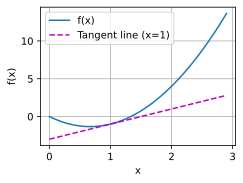

In [16]:
x = np.arange(0,3,0.1)
plot(x,[f(x),2 * x - 3],'x','f(x)',legend=['f(x)','Tangent line (x=1)'])

### 偏导数
到目前为止，我们只讨论了仅含一个变量的函数的微分。在深度学习中，函数通常依赖于许多变量。因此，我们需要将微分的思想推广到多元函数（multivariate function）上。

我们可以使用符号$\frac{\partial f(x_1,x_2)}{\partial x_1}$来表示函数$f(x_1,x_2)$对变量$x_1$的偏导数。

设$y = f(x_1, x_2, \ldots, x_n)$是一个具有$n$个变量的函数，$y$关于第$i$个参数$x_i$的偏导数(partial derivative)为:
$$\frac{\partial y}{\partial x_i} = \lim_{h \rightarrow 0} \frac{f(x_1, \ldots, x_{i-1}, x_i+h, x_{i+1}, \ldots, x_n) - f(x_1, \ldots, x_i, \ldots, x_n)}{h}.$$

为了计算$\frac{\partial y}{\partial x_i}$,我们可以简单地将$x_1, \ldots, x_{i-1}, x_{i+1}, \ldots, x_n$看作常数，并计算$y$关于$x_i$的导数。对于偏导数的表示，以下是等价的：
$$\frac{\partial y}{\partial x_i} = \frac{\partial f}{\partial x_i} = f_{x_i} = f_i = D_i f = D_{x_i} f.$$

举个例子，我们将计算函数$f(x,y) = x^2 + y^2$关于$x$和$y$的偏导数。我们可以将$y$看作常数，并计算$f(x,y)$关于$x$的导数，得到$2x$。我们可以将$x$看作常数，并计算$f(x,y)$关于$y$的导数，得到$2y$。因此，$\frac{\partial f(x,y)}{\partial x} = 2x$，$\frac{\partial f(x,y)}{\partial y} = 2y$



### 梯度
我们可以连接一个多元函数对其所有变量的偏导数，以得到该函数的梯度(gradient)向量。具体而言，设函数$f:\mathbb{R}^n\rightarrow\mathbb{R}$的输入是一个$n$维向量$\mathbf{x}=[x_1,x_2,\ldots,x_n]^\top$，并且输出是一个标量。函数$f(x)$相对于$X$的梯度是第一个包含$n$个偏导数的向量：  
$$
\nabla f(\mathbf{x}) = \begin{bmatrix}
\frac{\partial f}{\partial x_1}(\mathbf{x}) \\
\frac{\partial f}{\partial x_2}(\mathbf{x}) \\
\vdots \\
\frac{\partial f}{\partial x_n}(\mathbf{x})
\end{bmatrix}
$$
其中$\nabla_{\mathbf{x}} f(\mathbf{x})$通常在没有歧义时被写作$\nabla f(\mathbf{x})$。

假设$X$为$n$维向量，在微分多元函数时经常使用一下规则：
- 对于所有$\mathbf{A} \in \mathbb{R}^{m \times n}$,都有$\nabla_{\mathbf{x}} \mathbf{A} \mathbf{x} = \mathbf{A}^\top$
- 对于所有$\mathbf{A} \in \mathbb{R}^{n \times m}$,都有$\nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{A} = \mathbf{A}$
- 对于所有$\mathbf{A} \in \mathbb{R}^{n \times n}$,都有$\nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{A} \mathbf{x} = (\mathbf{A} + \mathbf{A}^\top)\mathbf{x}$
- $\nabla_{\mathbf{x}} \|\mathbf{x} \|^2 = \nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{x} = 2\mathbf{x}$
同样，对于任何矩阵$\mathbf{X}$,都有$\nabla_{\mathbf{X}} \|\mathbf{X} \|_F^2 = 2\mathbf{X}$。正如我们之后将看到的，梯度对于设计深度学习中的优化算法有很大的用处。

### 链式法则
然而，上面方法可能很难找到梯度。 这是因为在深度学习中，多元函数通常是复合（composite）的， 所以难以应用上述任何规则来微分这些函数。 幸运的是，链式法则可以被用来微分复合函数。

让我们先考虑单变量函数。假设函数$y=f(u)$和$u=g(x)$都是可微的，根据链式法则：
$$\frac{dy}{dx} = \frac{dy}{du} \frac{du}{dx}.$$


现在考虑一个更一般的场景，即函数具有任意数量的变量的情况。 假设可微分函数$y$
有变量$u_1, u_2, \ldots, u_m$，其中每个可微分函数$u_i$都有变量$x_1, x_2, \ldots, x_n$。 注意，$y$是$x_1, x_2, \ldots, x_n$的函数。 对于任意$i = 1, 2, \ldots, n$，链式法则给出：
$$\frac{\partial y}{\partial x_i} = \frac{\partial y}{\partial u_1} \frac{\partial u_1}{\partial x_i} + \frac{\partial y}{\partial u_2} \frac{\partial u_2}{\partial x_i} + \cdots + \frac{\partial y}{\partial u_m} \frac{\partial u_m}{\partial x_i}$$

### 小结
- 微分和积分是微积分的两个分支，前者可以应用于深度学习中的优化问题。

- 导数可以被解释为函数相对于其变量的瞬时变化率，它也是函数曲线的切线的斜率。

- 梯度是一个向量，其分量是多变量函数相对于其所有变量的偏导数。

- 链式法则可以用来微分复合函数。

## 自动微分
求导是几乎所有深度学习优化算法的关键步骤。 虽然求导的计算很简单，只需要一些基本的微积分。 但对于复杂的模型，手工进行更新是一件很痛苦的事情（而且经常容易出错）。

深度学习框架通过自动计算导数，即自动微分（automatic differentiation）来加快求导。 实际中，根据设计好的模型，系统会构建一个计算图（computational graph）， 来跟踪计算是哪些数据通过哪些操作组合起来产生输出。 自动微分使系统能够随后反向传播梯度。 这里，反向传播（backpropagate）意味着跟踪整个计算图，填充关于每个参数的偏导数。

### 一个简单的例子
作为一个演示例子，假设我们想对函数$y=2\mathbf{x}^{\top}\mathbf{x}$关于列向量$\mathbf{x}$求导。 首先，我们创建变量x并为其分配一个初始值。

In [12]:
import torch
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

在我们计算$y$关于$\mathbf{x}$的梯度之前，需要一个地方来存储梯度。 重要的是，我们不会在每次对一个参数求导时都分配新的内存。 因为我们经常会成千上万次地更新相同的参数，每次都分配新的内存可能很快就会将内存耗尽。 注意，一个标量函数关于向量$\mathbf{x}$的梯度是向量，并且与$\mathbf{x}$具有相同的形状。

In [13]:
x.requires_grad_(True)  # 等价于x=torch.arange(4.0,requires_grad=True)
x.grad  # 默认值是None

现在计算$y$。

In [14]:
y = 2 * torch.dot(x,x)
y

tensor(28., grad_fn=<MulBackward0>)

x是一个长度为4的向量，计算x和x的点积，得到了我们赋值给y的标量输出。 接下来，通过调用反向传播函数来自动计算y关于x每个分量的梯度，并打印这些梯度。

In [15]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

函数$y=2\mathbf{x}^{\top}\mathbf{x}$关于$\mathbf{x}$的梯度应为$4\mathbf{x}$。 让我们快速验证这个梯度是否计算正确。

In [16]:
x.grad == 4 * x

tensor([True, True, True, True])

现在计算x的另一个函数

In [17]:
# 在默认情况下，PyTorch会累积梯度，我们需要清除之前的值
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

### 非标量变量的反向传播
当y不是标量时，向量y关于向量x的导数的最自然解释是一个矩阵。 对于高阶和高维的y和x，求导的结果可以是一个高阶张量。

然而，虽然这些更奇特的对象确实出现在高级机器学习中（包括深度学习中）， 但当调用向量的反向计算时，我们通常会试图计算一批训练样本中每个组成部分的损失函数的导数。 这里，我们的目的不是计算微分矩阵，而是单独计算批量中每个样本的偏导数之和。

In [18]:
# 对非标量调用backward需要传入一个gradient参数，该参数指定微分函数关于self的梯度。
# 本例只想求偏导数的和，所以传递一个1的梯度是合适的
x.grad.zero_()
y = x * x
# 等价于y.backward(torch.ones(len(x)))
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

### 分离计算
有时，我们希望将某些计算移动到记录的计算图之外。 例如，假设y是作为x的函数计算的，而z则是作为y和x的函数计算的。 想象一下，我们想计算z关于x的梯度，但由于某种原因，希望将y视为一个常数， 并且只考虑到x在y被计算后发挥的作用。

这里可以分离y来返回一个新变量u，该变量与y具有相同的值， 但丢弃计算图中如何计算y的任何信息。 换句话说，梯度不会向后流经u到x。 因此，下面的反向传播函数计算z=u*x关于x的偏导数，同时将u作为常数处理， 而不是z=x*x*x关于x的偏导数。

In [19]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

由于记录了y的计算结果，我们可以随后在y上调用反向传播， 得到y=x*x关于的x的导数，即2*x。

In [20]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

###  Python控制流的梯度计算
使用自动微分的一个好处是： 即使构建函数的计算图需要通过Python控制流（例如，条件、循环或任意函数调用），我们仍然可以计算得到的变量的梯度。 在下面的代码中，while循环的迭代次数和if语句的结果都取决于输入a的值。

In [21]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

让我们计算梯度

In [22]:
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

我们现在可以分析上面定义的f函数。 请注意，它在其输入a中是分段线性的。 换言之，对于任何a，存在某个常量标量k，使得f(a)=k*a，其中k的值取决于输入a，因此可以用d/a验证梯度是否正确。

In [23]:
a.grad == d / a

tensor(True)

### 小结
深度学习框架可以自动计算导数：我们首先将梯度附加到想要对其计算偏导数的变量上，然后记录目标值的计算，执行它的反向传播函数，并访问得到的梯度。